In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gmplot
import folium
import ipywidgets
import heapq
import math
import tkinter as tk
import nbimporter 


**Graph avec networkx**

In [2]:
adjacencies = {
   'Genève': {'Vaud': 65.0},
   #il existe une autre distance pour berne et fribourg
    'Vaud': {'Berne':[105.2,116.1,121.6],'Valais':148.9, 'Fribourg':[86.2,81.8,82.1], 'Neuchâtel':69.2},
    'Valais': {'Berne':[200.1,133.0,243.6], 'uri':[148.3,226.4,368.5], 'Tessin':[177.8,250.7]},
    'Fribourg': {'Berne':35.4},
    'Neuchâtel': {'Jura':[68.9,68.7,97.5],'Berne':[52.3,69.9]},
    'Jura':{'Solothurn':[61.0,68.9]},
    'Berne': {'uri':[172.3,170.3,158.8],'Jura':[106.7,109.9],'Solothurn':[41.1,37.7,40.7], 'Luzern':[190.9,96.4,124.0],'obwalden':[132.7,102.8,96.2],'nidwalden':[128.6,126.6,115.1]},
    'Solothurn': {'Basel-Landschaft':[45.6,45.8,45.0],'Aargau':68.4,'Luzern':[82.0,85.7]},
    'Basel-Landschaft': {'Aargau':[60.1,66.7,63.3], 'Basel-Stadt':26.1},
    'Aargau': {'Luzern':[61.7,49.8,49.0], 'Zürich':[36.6,44.7,35.5], 'zug':[43.4,39.2,59.8],'Basel-Stadt':[70.2,83.6,72.1]},
    'Zürich': {'schaffhausen':[52.7,46.4,52.5],'thurgau':[64.5,75.1],'st.Gallen':[86.2,82.8,97.3],'zug':[33.8,31.5,29.8],'schwyz':[59.7,54.5,64.2]},
    'thurgau': {'st.Gallen':[34.4,41.4,41.8],'schaffhausen':[69.0,55.7,47.5]},
    'st.Gallen': {'graubunden':[140.7,174.2],'Glarus':[88.6,124.3,96.9],'schwyz':[114.1,151.4,168.5]},
    'Glarus': {'graubunden':[107.8,102.3],'schwyz':[66.4,101.1],'uri':[111.1,142.3,155.9]},
    'schwyz': {'uri':43.7,'nidwalden':[46.5,63.6],'Luzern':[45.3,34.8],'zug':[25.8,37.9,28.3]},
    'uri': {'graubunden':[196.7,184.4],'Tessin':126.4,'nidwalden':53.6},
    'Tessin': {'graubunden':145.3},
    'Luzern':{'zug':[31.0,33.4],'obwalden':24.2,'nidwalden':20.6},
    'nidwalden':{'obwalden':26.9}
}

In [3]:
# créer un nouveau graphe
G = nx.Graph()

In [4]:
nodes = list(adjacencies.keys())
for node in nodes:
    if node in adjacencies:
        print(f"Les voisins de {node} sont :")
        for neighbor in adjacencies[node]:
            print(f" - {neighbor} : {adjacencies[node][neighbor]} km")
    else:
        print(f"{node} n'est pas présent dans le graphe.")

Les voisins de Genève sont :
 - Vaud : 65.0 km
Les voisins de Vaud sont :
 - Berne : [105.2, 116.1, 121.6] km
 - Valais : 148.9 km
 - Fribourg : [86.2, 81.8, 82.1] km
 - Neuchâtel : 69.2 km
Les voisins de Valais sont :
 - Berne : [200.1, 133.0, 243.6] km
 - uri : [148.3, 226.4, 368.5] km
 - Tessin : [177.8, 250.7] km
Les voisins de Fribourg sont :
 - Berne : 35.4 km
Les voisins de Neuchâtel sont :
 - Jura : [68.9, 68.7, 97.5] km
 - Berne : [52.3, 69.9] km
Les voisins de Jura sont :
 - Solothurn : [61.0, 68.9] km
Les voisins de Berne sont :
 - uri : [172.3, 170.3, 158.8] km
 - Jura : [106.7, 109.9] km
 - Solothurn : [41.1, 37.7, 40.7] km
 - Luzern : [190.9, 96.4, 124.0] km
 - obwalden : [132.7, 102.8, 96.2] km
 - nidwalden : [128.6, 126.6, 115.1] km
Les voisins de Solothurn sont :
 - Basel-Landschaft : [45.6, 45.8, 45.0] km
 - Aargau : 68.4 km
 - Luzern : [82.0, 85.7] km
Les voisins de Basel-Landschaft sont :
 - Aargau : [60.1, 66.7, 63.3] km
 - Basel-Stadt : 26.1 km
Les voisins de Aarg

In [5]:
# ajouter des noeuds au graphe
#nodes = list(adjacencies.keys())
#G.add_nodes_from(nodes)


In [6]:
#for node, neighbors in adjacencies.items():
 #   for neighbor, distances in neighbors.items():
  #      if isinstance(distances, float):
   #         distance = distances
    #    else:
     #       distance = min(distances)
      #  G.add_edge(node, neighbor, weight=distance)

In [26]:
def graph():
    # ajouter des noeuds au graphe
    nodes = list(adjacencies.keys())
    G.add_nodes_from(nodes)

    for node, neighbors in adjacencies.items():
        for neighbor, distances in neighbors.items():
            if isinstance(distances, float):
                distance = distances
            else:
                distance = min(distances)
            G.add_edge(node, neighbor, weight=distance)


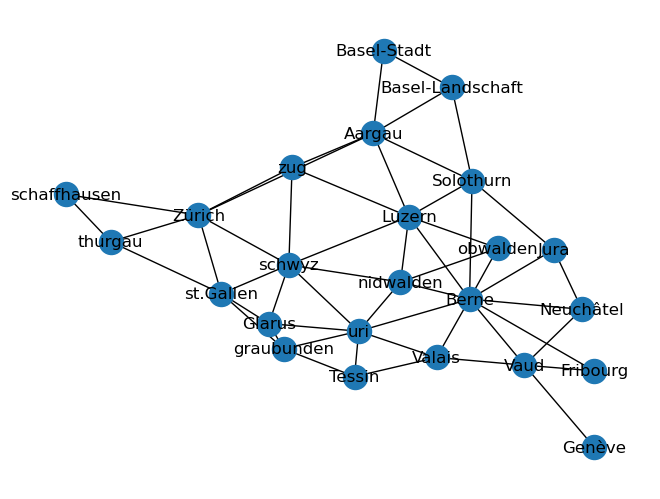

In [7]:
nx.draw(G, with_labels=True)

**Graph avec folium**

In [8]:
import folium
import ipywidgets

In [9]:
# Coordonnées des villes
coords = {
    'Genève': (46.204391, 6.143158),
    'Vaud': (46.561313, 6.536765),
    'Zug':(47.166167, 8.515495),
    'Valais': (46.190461, 7.544923),
    'Fribourg': (46.806403, 7.153656),
    'Neuchâtel': (46.992979, 6.931933),
    'Jura': (46.762475, 5.672916),
    'Berne': (47.313555, 7.444609),
    'Solothurn': (47.208835, 7.532291),
    'Basel-Landschaft': (47.441812, 7.764400),
    'Basel-Stadt':(447.561925, 7.592768),
    'schaffhaussen':(47.707766, 8.641442),
    'Aargau': (47.390434, 8.0457015),
    'Zürich': (47.368650, 8.539183),
    'thurgau': (47.6321, 9.1087),
    'st.Gallen': (47.424482, 9.376717),
    'Glarus': (47.040427, 9.067208),
    'Graubunden':(46.656987, 9.578026),
    'schwyz': (47.020714, 8.652988),
    'uri': (41.486065, -71.530854),
    'Tessin': (46.331734, 8.800453),
    'Luzern': (47.050038, 8.308929),
    'nidwalden': (46.926702, 8.384998),
    'obwalden': (46.877858, 8.251249)
}

In [10]:
# show map types using ipywidgets

# widget
select_widget=ipywidgets.Select(
    options=['Open Street Map', 'Terrain', 'Toner', 'Watercolor', 'Positron', 'Dark Matter'],
    value='Open Street Map',
    description='Map Type:',
    disabled=False)

# Initialisation de la carte centrée sur la Suisse
m = folium.Map(location=[46.8182, 8.2275], zoom_start=8)

# Ajout des marqueurs pour chaque ville
for ville, coord in coords.items():
    folium.Marker(location=coord, popup=ville).add_to(m)
    
# Affichage de la carte
m
# widget function
def select(map_type):
    if map_type == 'Open Street Map':
        display(m)
    if map_type == 'Terrain':
        display(folium.Map(location=[46.815514 , 8.224472], tiles='Stamen Terrain', zoom_start=8, height=400))
    if map_type == 'Toner':
        display(folium.Map(location=[46.815514 , 8.224472], tiles='Stamen Toner', zoom_start=8, height=400))
    if map_type == 'Watercolor':
        display(folium.Map(location=[46.815514 , 8.224472], tiles='Stamen Watercolor', zoom_start=8, height=400))
    if map_type == 'Positron':
        display(folium.Map(location=[46.815514 , 8.224472], tiles='CartoDB Positron', zoom_start=8, height=400))
    if map_type == 'Dark Matter':
        display(folium.Map(location=[46.815514 , 8.224472], tiles='CartoDB Dark_Matter', zoom_start=8, height=400))
    #if map_type == 'Satellite':
    #    display(folium.Map(location=[46.815514 , 8.224472], tiles='CartoDB positron', zoom_start=8, height=400))
    
# interaction between widgets and function    
ipywidgets.interact(select, map_type=select_widget)

interactive(children=(Select(description='Map Type:', options=('Open Street Map', 'Terrain', 'Toner', 'Waterco…

<function __main__.select(map_type)>

**algorithms** 

In [11]:
#Parcours en profondeur : 
depart = input("Donner le point de départ : ")
dfs_edges = list(nx.dfs_edges(G, source=depart))
print(dfs_edges)

Donner le point de départ : Genève
[('Genève', 'Vaud'), ('Vaud', 'Berne'), ('Berne', 'Valais'), ('Valais', 'uri'), ('uri', 'Glarus'), ('Glarus', 'st.Gallen'), ('st.Gallen', 'Zürich'), ('Zürich', 'Aargau'), ('Aargau', 'Solothurn'), ('Solothurn', 'Jura'), ('Jura', 'Neuchâtel'), ('Solothurn', 'Basel-Landschaft'), ('Basel-Landschaft', 'Basel-Stadt'), ('Solothurn', 'Luzern'), ('Luzern', 'schwyz'), ('schwyz', 'nidwalden'), ('nidwalden', 'obwalden'), ('schwyz', 'zug'), ('Zürich', 'schaffhausen'), ('schaffhausen', 'thurgau'), ('st.Gallen', 'graubunden'), ('graubunden', 'Tessin'), ('Berne', 'Fribourg')]


In [12]:
#Parcours en largeur : 
depart = input("Donner le point de départ : ")
bfs_edges = list(nx.bfs_edges(G, source=depart))
print(bfs_edges)

Donner le point de départ : Tessin
[('Tessin', 'Valais'), ('Tessin', 'uri'), ('Tessin', 'graubunden'), ('Valais', 'Vaud'), ('Valais', 'Berne'), ('uri', 'Glarus'), ('uri', 'schwyz'), ('uri', 'nidwalden'), ('graubunden', 'st.Gallen'), ('Vaud', 'Genève'), ('Vaud', 'Fribourg'), ('Vaud', 'Neuchâtel'), ('Berne', 'Jura'), ('Berne', 'Solothurn'), ('Berne', 'Luzern'), ('Berne', 'obwalden'), ('schwyz', 'Zürich'), ('schwyz', 'zug'), ('st.Gallen', 'thurgau'), ('Solothurn', 'Basel-Landschaft'), ('Solothurn', 'Aargau'), ('Zürich', 'schaffhausen'), ('Basel-Landschaft', 'Basel-Stadt')]


In [13]:
#dijkstra
def dijkstra(G, city1, city2):
    distance = nx.dijkstra_path_length(G, city1, city2)
    path = nx.dijkstra_path(G, city1, city2)
    print(f"The shortest path between {city1} and {city2} is: {path}")
    print(f"The shortest distance between {city1} and {city2} is: {distance} km") 
    #return path, distance

city1 = input("Donner le point de départ : ")
city2=input("Donner le point d'arrivée : ")
# Call dijkstra function
dijkstra(G, city1, city2)

Donner le point de départ : Genève
Donner le point d'arrivée : Berne
The shortest path between Genève and Berne is: ['Genève', 'Vaud', 'Berne']
The shortest distance between Genève and Berne is: 170.2 km


In [14]:
#bellman_ford
def bellman_ford(G, city1, city2):
    # Calculate the shortest path and distance between two cities using Bellman-Ford algorithm

    path = list(nx.bellman_ford_path(G, source=city1,target=city2))
    distance = nx.bellman_ford_path_length(G, city1, city2)
    
    # Print the shortest path and distance
    print(f"The shortest path between {city1} and {city2} is: {path}")
    print(f"The shortest distance between {city1} and {city2} is: {distance} km")
    
    return path,distance

city1 = input("Donner le point de départ : ")
city2 = input("Donner le point d'arrivée : ")
distance = bellman_ford(G, city1, city2)

Donner le point de départ : Genève
Donner le point d'arrivée : Berne
The shortest path between Genève and Berne is: ['Genève', 'Vaud', 'Berne']
The shortest distance between Genève and Berne is: 170.2 km


In [15]:
#Algorithme to find the shortest path 
#Fama mochkla f chemin binet quelques villes mech lkol 

import heapq

def shortest_path(adjacencies, start, goal):
    # Create a dictionary to store the distances from the start node to all other nodes
    distances = {node: float('inf') for node in adjacencies}
    distances[start] = 0

    # Create a priority queue to store the nodes to be visited
    queue = [(0, start)]  # (distance, node)

    # Create a dictionary to store the previous node in the shortest path
    previous = {}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        # Check if the current node is the goal
        if current_node == goal:
            path = []
            while current_node in previous:
                path.append(current_node)
                current_node = previous[current_node]
            path.append(start)
            path.reverse()
            return path

        # Check if the current distance is smaller than the recorded distance for the current node
        if current_distance > distances[current_node]:
            continue

        # Explore the neighboring nodes
        neighbors = adjacencies[current_node]
        for neighbor, distance in neighbors.items():
            if isinstance(distance, list):
                min_distance = min(distance)  # Use the minimum distance if multiple distances are available
            else:
                min_distance = distance

            new_distance = current_distance + min_distance

            # Check if the new distance is smaller than the recorded distance for the neighbor
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (new_distance, neighbor))

    # If no path is found
    return None

start = input("Donner le point de départ : ")
goal=input("Donner le point d'arrivée : ")
shortest_path(adjacencies, start, goal)

Donner le point de départ : Genève
Donner le point d'arrivée : Berne


['Genève', 'Vaud', 'Berne']

In [16]:
#Hedha fih mochkla w ma habech yekhdem 
#floyd_warshall algorithm 

import math

def floyd_warshall(G):
    # Create a copy of the graph
    dist = {node: dict(neighbors) for node, neighbors in G.items()}

    # Initialize distances between nodes
    for i in dist:
        for j in dist:
            if i != j and j not in dist[i]:
                dist[i][j] = math.inf

    # Compute shortest paths
    for k in dist:
        for i in dist:
            for j in dist:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

shortest_distances = floyd_warshall(G)

start_node = input("Donner le point de départ : ")
goal_node=input("Donner le point d'arrivée : ")

# Print the shortest path if it exists
if shortest_distances[start_node][goal_node] != math.inf:
    path = nx.shortest_path(G, start_node, goal_node, weight='weight')
    print(f"Shortest path from {start_node} to {goal_node}:")
    print(" -> ".join(path))
else:
    print(f"No path found from {start_node} to {goal_node}.")

AttributeError: 'Graph' object has no attribute 'items'

In [17]:
import tkinter as tk

class Main:
    def __init__(self, master):
        self.master = master
        master.title("Menu")
        self.choice = None
        
        self.label = tk.Label(master, text="Choisissez l'algorithme de votre choix :")
        self.label.pack()
        
        self.button1 = tk.Button(master, text="Recherche en profondeur", command=self.choose_1)
        self.button1.pack()
        
        self.button2 = tk.Button(master, text="Recherche en largeur", command=self.choose_2)
        self.button2.pack()
        
        self.button3 = tk.Button(master, text="Algorithme de Dijkstra", command=self.choose_3)
        self.button3.pack()
        
        self.button4 = tk.Button(master, text="Algorithme de Bellman-Ford", command=self.choose_4)
        self.button4.pack()
        
        self.quit_button = tk.Button(master, text="Quitter", command=master.quit)
        self.quit_button.pack()
    
    def choose_1(self):
        self.choice = 1
        print("Vous avez choisi la recherche en profondeur.")
        self.master.destroy()
        
    def choose_2(self):
        self.choice = 2
        print("Vous avez choisi la recherche en largeur.")
        self.master.destroy()
        
    def choose_3(self):
        self.choice = 3
        print("Vous avez choisi l'algorithme de Dijkstra.")
        self.master.destroy()
        
    def choose_4(self):
        self.choice = 4
        print("Vous avez choisi l'algorithme de Bellman-Ford.")
        self.master.destroy()
        
    def get_choice(self):
        return self.choice


In [21]:
import networkx as nx

def dfs_path(G, start, goal):
    """
    Recherche d'un chemin en profondeur entre le noeud start et le noeud goal dans le graphe graph.
    
    """
    start = input("Donner le point de départ : ")
    goal =input("Donner le point d'arrivée : ")
    
    visited = set()  # ensemble des noeuds déjà visités
    stack = [(start, [start])]  # pile contenant les noeuds à visiter et leur chemin parcouru jusqu'à présent
    
    while stack:
        (node, path) = stack.pop()  # noeud actuel et chemin parcouru jusqu'à présent
        if node not in visited:
            visited.add(node)
            if node == goal:
                return path  # chemin trouvé
            for neighbor in G[node]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))  # ajouter le voisin à la pile avec son chemin parcouru jusqu'à présent
    
    return None  # pas de chemin trouvé

# Exemple d'utilisation
#graph = nx.Graph()
#graph.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (4, 6), (5, 6)])
#start = 1
#goal = 6
path = dfs_path(G, start, goal)
print(path)


Donner le point de départ : Genève
Donner le point d'arrivée : Vaud
['Genève', 'Vaud']


In [24]:
import networkx as nx

def bfs_path(G, start, goal):
    """
    Recherche d'un chemin en largeur entre le noeud start et le noeud goal dans le graphe graph.
    """
    start = input("Donner le point de départ : ")
    goal =input("Donner le point d'arrivée : ")
    
    visited = set()  # ensemble des noeuds déjà visités
    queue = [(start, [start])]  # file contenant les noeuds à visiter et leur chemin parcouru jusqu'à présent
    
    while queue:
        (node, path) = queue.pop(0)  # noeud actuel et chemin parcouru jusqu'à présent
        if node not in visited:
            visited.add(node)
            if node == goal:
                return path  # chemin trouvé
            for neighbor in G[node]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))  # ajouter le voisin à la file avec son chemin parcouru jusqu'à présent
    
    return None  # pas de chemin trouvé

# Exemple d'utilisation

path = bfs_path(G, start, goal)
print(path)


Donner le point de départ : Genève
Donner le point d'arrivée : Tessin
['Genève', 'Vaud', 'Valais', 'Tessin']


In [25]:
class Main:
    def __init__(self):
        self.choice = None
    
    def display_menu(self):
        print("Choisissez l'algorithme de votre choix :")
        print("Pour la recherche en profondeur, tapez 1")
        print("Pour la recherche en largeur, tapez 2")
        print("Pour l'algorithme de Dijkstra, tapez 3")
        print("Pour l'algorithme de Bellman-Ford, tapez 4")
        print("Pour quitter, tapez 0")
    
    def get_choice(self):
        while True:
            try:
                self.choice = int(input())
                if self.choice not in [0, 1, 2, 3, 4]:
                    print("Choix non valide, veuillez réessayer.")
                    continue
                else:
                    break
            except ValueError:
                print("Erreur : entrée non valide")
                continue
    
    def run_algorithm(self):
        if self.choice == 0:
            print("Au revoir !")
        elif self.choice == 1:
            print("Vous avez choisi la recherche en profondeur.")
            # Appel à la fonction pour la recherche en profondeur
        elif self.choice == 2:
            print("Vous avez choisi la recherche en largeur.")
            # Appel à la fonction pour la recherche en largeur
        elif self.choice == 3:
            print("Vous avez choisi l'algorithme de Dijkstra.")
            # Appel à la fonction pour l'algorithme de Dijkstra
        elif self.choice == 4:
            print("Vous avez choisi l'algorithme de Bellman-Ford.")
            # Appel à la fonction pour l'algorithme de Bellman-Ford
    
    def start(self):
        while True:
            self.display_menu()
            self.get_choice()
            self.run_algorithm()
            if self.choice == 0:
                break

In [27]:
start(self)

NameError: name 'self' is not defined